# 感覚入力の次元を増やす


これまでは入力がスカラーを想定していたが、今回は入力がベクトルになることを想定する。  
例えば、食べ物のサイズを予想するために、入力ベクトルの特徴量が光の強さと、色などのケースを考える。

スカラーではFは以下のように表現されていた。

<img src="../images/7.png" >

行列表現を利用すると、以下のように書くことができる。


<img src="../images/37.png" >

スカラーの時と同じようにFをφで微分することで勾配を求めることができ、  
これを利用して自由エネルギーを最小化することができる。

<img src="../images/38.png" >

εp, εuを定義すると、

<img src="../images/39_40.png" >

(38)はシンプルに書くことができる。

<img src="../images/41.png" >


全体のアーキテクチャは以下のようになる。

<img src="../images/fig5.png" >

φ1, φ2がどのようにお互いの関連性が定義されているかを詳しくみていく。  
アーキテクチャの図でも示されているように、φ1, φ2はを利用して、以下のように関係づけられ、  
感覚の予測誤差、εuの入力となっている。

<img src="../images/42.png" >

したがって、上記ベクトルの要素の導関数をベクトルϕの要素に関して求めることができる。

<img src="../images/43.png" >

これで(41)式は次のように書くことができます。

<img src="../images/44.png" >

単純なモデルの場合と同様に、予測誤差は以下のダイナミクスを持つノードによって計算することができる。


<img src="../images/45_46.png" >

> 単純なモデルに対してと同様に、シナプス接続にエンコードされたパラメータの更新ルールも見つけることができます。これは以前に提示されたルールを一般化します。


<img src="../images/47.png" >

共分散行列の更新のルールは以下のようになる。

<img src="../images/48_49.png" >

# ヘブの法則に従うように修正する
> 式(48)、(49)、および(55)）には、行列の逆行列Σ^(-1)に等しい項が含まれます。逆行列Σ^(-1)の各要素を計算するには、対応するΣの要素の知識だけでなく、他の要素の知識も必要です。例えば、2次元ベクトルuの場合、シナプス接続の更新ルールであるΣu,1,1（式(49)）のエンコーディングは、Σ^(-1)u,1,1 = Σu,2,2/|Σu|の計算を要求します。したがって、シナプス重みΣu,1,1の変更は重みΣu,2,2の値に依存しますが、これらは異なるニューロン間の接続の重みです。したがって、更新ルールは導入で予測誤差の計算を行うネットワークのアーキテクチャをわずかに修正することで、可塑性ルールで行列の逆行列を計算する必要性がなくなります。

> モデル全体を考慮する代わりに、現在は予測誤差を計算する単一ノードの計算に焦点を当てます。モデルでは、各レベルでの予測誤差が次のように収束することを望んでいます：

<img src="../images/57.png" >

※ これからヘブの法則が成立するようにeを導入するが、最終的なεuの定義に影響を与えないことがのちに示される。


> 上記の式で、Σiは特徴φiの分散（上位レベルによって予測された平均周辺）を指します：

<img src="../images/58.png" >

ヘブの法則に修正したアーキテクチャは以下のようになる。

<img src="../images/fig7.png" >

> 予測誤差ノードに接続され、重みエンコーディングΣiを介してそれから入力を受け取る追加の抑制性インターニューロンeiが含まれます。このモデルのダイナミクスは、以下の一連の方程式によって記述されます：


<img src="../images/59_60.png" >

不動点での活動レベルは、式(59)～(60)の左辺を0に設定し、その結果得られる連立方程式を解くことで見つけることができる。

<img src="../images/61_62.png" >

Σiを符号化する接続の可塑性に関するルールを以下のように定義する。

<img src="../images/63.png" >

この式に、(61), (62)を代入すると、

<img src="../images/65.png" >

になり、これは(58)と同じものとなる。  
eを導入することで、ヘブの法則を満たせることが示された。

上記の議論は入力がスカラーを前提にしたが、入力がベクターの時でも同様に成立する。

# 演習5
試行を通じての分散Σiの学習をシミュレートします。簡単のために、式(59)–(60)で説明されたネットワークのみをシミュレートし、変数φが一定であると仮定します。各試行で平均5、分散2の正規分布から入力φiを生成し、gi(φi+1) = 5と設定します（これにより、上位レベルがφiの平均を正確に予測します）。ネットワークを20時間単位でシミュレートし、その後、学習率α = 0.01で重みΣiを更新します。1000試行をシミュレートし、試行を通じてΣiがどのように変化するかをプロットします。
シミュレーションの結果は図8に示され、それらはシナプス重みΣiがφiの分散の近傍に近づくことを示しています。

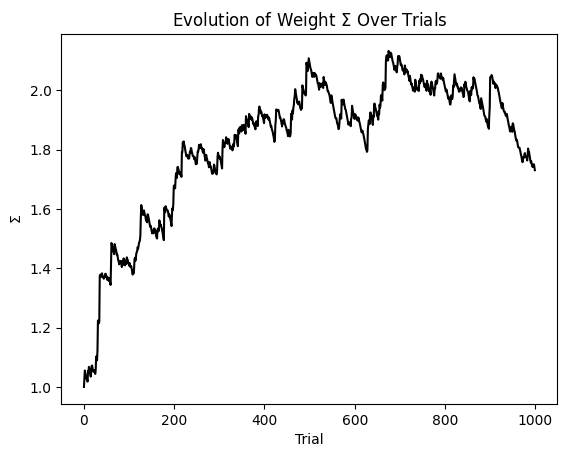

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean_phi = 5  # mean of input from the current level
Sigma_phi = 2  # variance of input from the current level
phi_above = 5  # input from the level above
DT = 0.01  # integration step
MAXT = 20  # maximum time considered
TRIALS = 1000  # number of simulated trials
LRATE = 0.01  # learning rate
Sigma = np.zeros(TRIALS)  # initializing the value of weight
Sigma[0] = 1  # starting value of Sigma

for trial in range(1, TRIALS):
    error = np.zeros(int(MAXT/DT))
    e = np.zeros(int(MAXT/DT))  # initializing the interneuron
    phi = mean_phi + np.sqrt(Sigma_phi) * np.random.randn()
    for i in range(1, int(MAXT/DT)):
        # [59]
        error[i] = error[i-1] + DT * (phi - phi_above - e[i-1])
        # [60]
        e[i] = e[i-1] + DT * (Sigma[trial - 1] * error[i-1] - e[i-1])
    # [63]
    Sigma[trial] = Sigma[trial - 1] + LRATE * (error[-1] * e[-1] - 1)

# Plotting
plt.plot(Sigma, 'k')
plt.xlabel('Trial')
plt.ylabel(r'$\Sigma$')
plt.title('Evolution of Weight $\Sigma$ Over Trials')
plt.show()